In [1]:
# as usual we need to import the key libraries we need to store, analyse and plot the network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# let's also get a network from the folder "data"
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [3]:
# the data comes as unweighted list of edges
# let's store the network
G=nx.Graph()
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r")
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

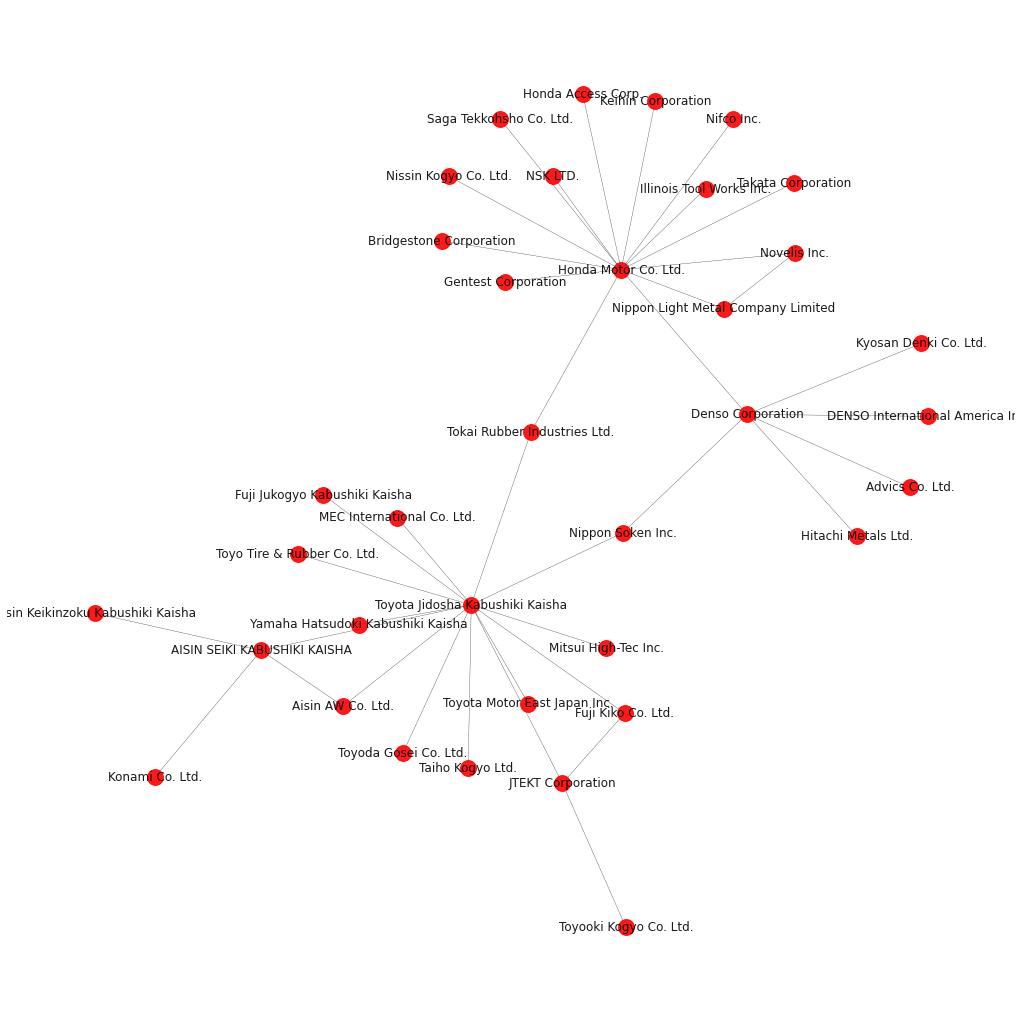

In [24]:
# let's plot the network


ids_label={} # this dictionary is needed to show the node ids
for i in G.nodes():
    ids_label[i]=str(i)

plt.figure(1,figsize=(14,14))   
    
nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

# Degree centrality


In [5]:
# the degree is simply the number of connections of each node

# let's compute the degree for each node

for i in G.nodes():
    print (i,G.degree(i))  # this is the function to compute the degree of each node directly!

Nippon 2
Light 1
Novelis 1
Inc.,Honda 1
Honda 1
Motor 1
Toyota 1
Jidosha 1
Soken 1
Fuji 1
Kiko 1
Aisin 1
AW 1
AISIN 1
SEIKI 1
JTEKT 1
Corporation,Toyooki 1
Hitachi 1
Metals 1
Denso 3
Corporation,Advics 1
Corporation,DENSO 1
Corporation,Kyosan 1


In [6]:
# how do we get the list of degree for each node ordered from the highest to the lowest?

degree=[]  # list of degree
for i in G.nodes():
        degree.append([G.degree(i),i])   # we put in the list a list of two values, the degree and id of each node
        
        
degree=sorted(degree,reverse=True) # we sort the list using the first element of each list (the degree)

In [7]:
# let's print the top 10
for i in range(10):
    print ("Rank = ",i+1,"Degree = ", degree[i][0], "Node id = ",degree[i][1])

Rank =  1 Degree =  3 Node id =  Denso
Rank =  2 Degree =  2 Node id =  Nippon
Rank =  3 Degree =  1 Node id =  Toyota
Rank =  4 Degree =  1 Node id =  Soken
Rank =  5 Degree =  1 Node id =  SEIKI
Rank =  6 Degree =  1 Node id =  Novelis
Rank =  7 Degree =  1 Node id =  Motor
Rank =  8 Degree =  1 Node id =  Metals
Rank =  9 Degree =  1 Node id =  Light
Rank =  10 Degree =  1 Node id =  Kiko


In [8]:
# we can plot the histogram of the degree
# To this end, we just need a list with all the degree values

degree_list=[]
for i in G.nodes():
    degree_list.append(G.degree(i))
    
print (degree_list)

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1]


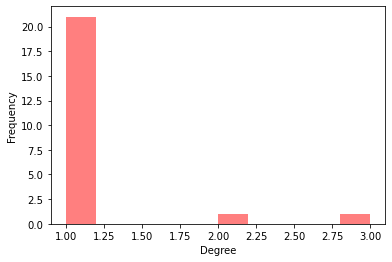

In [9]:
# we then plot it!
plt.hist(degree_list, bins=10,color='Red',alpha=0.5)   # we can specify the number of bins
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.show()

In [10]:
# it is useful to create a function that takes in input the network and plots the histogram of the degree

def degree_histogram(G): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    degree_list=[]
    for i in G.nodes():
        degree_list.append(G.degree(i))
    
    plt.hist(degree_list, bins=10,color='Red',alpha=0.5)   # we can specify the number of "bins"
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.show()
    

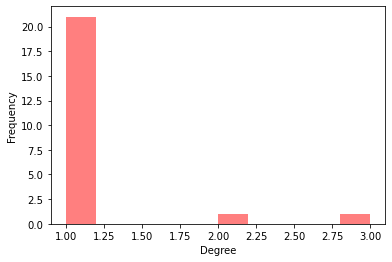

In [11]:
degree_histogram(G)

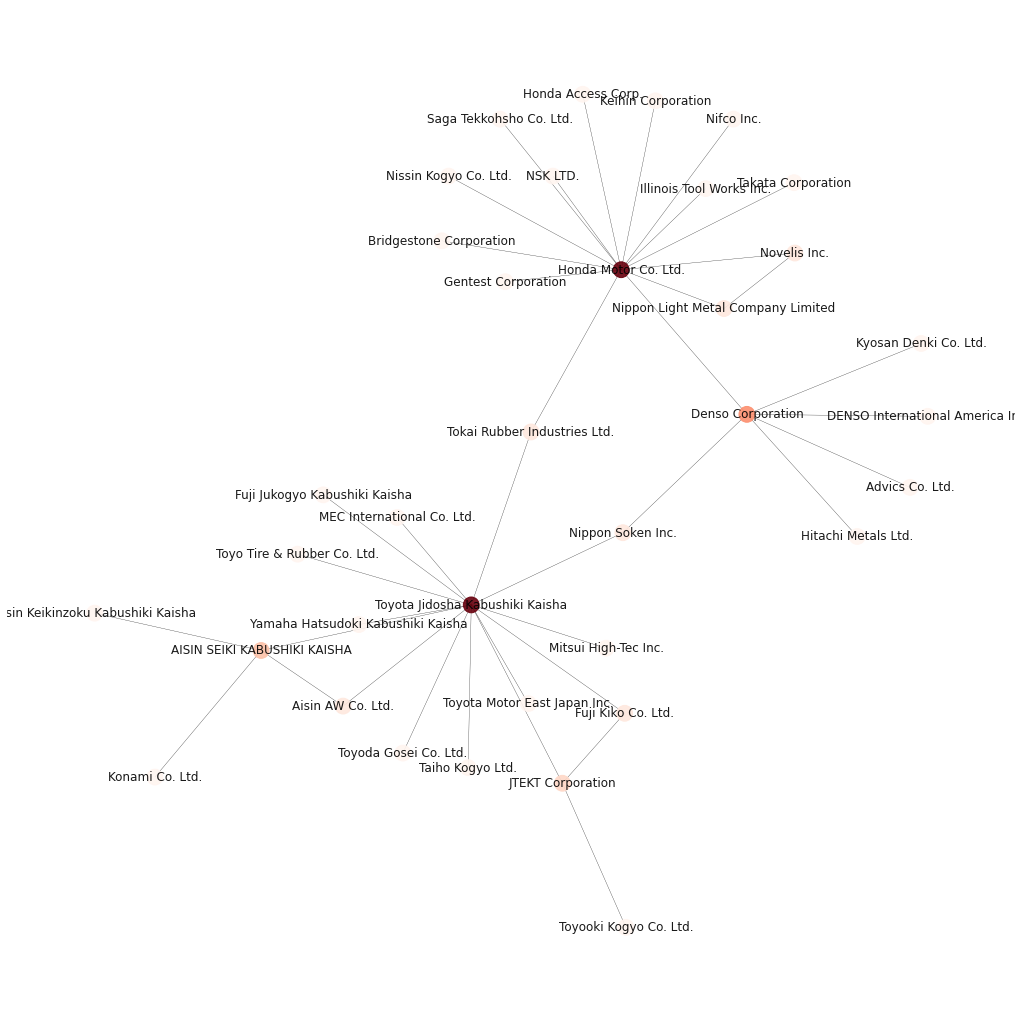

In [25]:
# we can also use the degree as attribute in the plot of the graph

color_code=[]  # this is the list
for i in G.nodes():
    color_code.append(G.degree(i))  # each element in the list is the degree of each node



# let's plot it

plt.figure(1,figsize=(14,14))  

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

In [13]:
G=nx.Graph()
c=0
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r",encoding='latin1')
for i in a:
    n=i.strip().split(",")
    G.add_edge(n[0],n[1])
    c+=1
a.close()

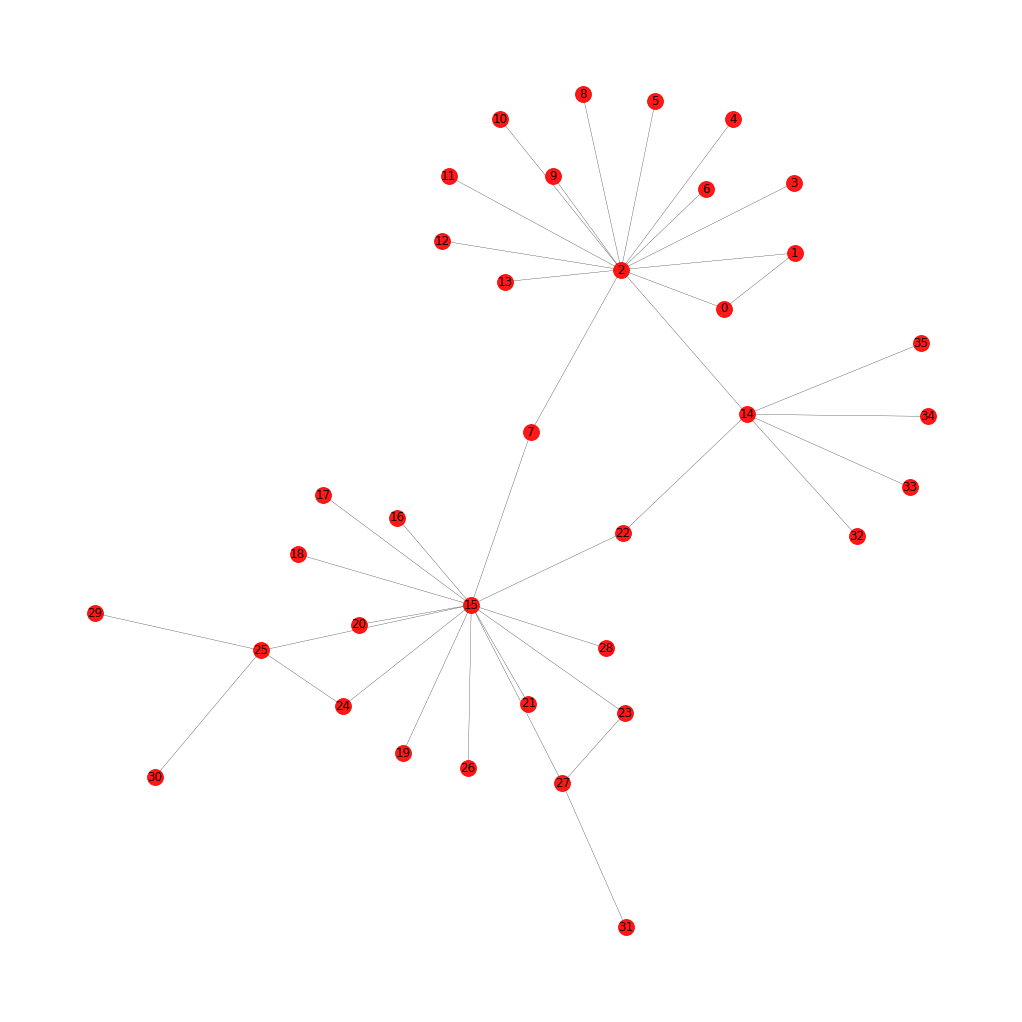

In [26]:
ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=counter
    counter+=1

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [15]:
# we can plot the histogram of the degree
# let's use the general function we used the other time


def centrality_histogram(G,bins,color_bars,alpha_value,centrality_measure): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    
    # here we define which centrality measure to consider
    if centrality_measure=="betweenness":
        l=nx.betweenness_centrality(G)
        
    if centrality_measure=="closeness":
        l=nx.closeness_centrality(G)
        
    if centrality_measure=="degree":
        l={}
        for i in G.nodes():
            l[i]=G.degree(i)
        
    # the plot is then done after the selection of the centrality measure
    
    
    cent_list=[]
    for i in l:
            cent_list.append(l[i])
    
    plt.hist(cent_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel(centrality_measure)  # note how "centrality_measure" is an input of the function now!
    plt.ylabel('Frequency')

    plt.show()

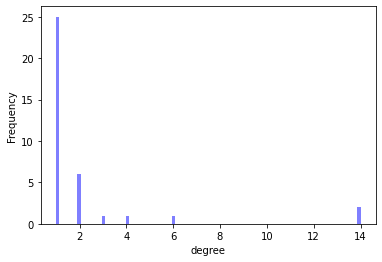

In [16]:
centrality_histogram(G,100,'blue',0.5,'degree')

In [17]:
average_degree=2.*G.number_of_edges()/G.number_of_nodes() # why?!

print (average_degree)

2.1666666666666665


In [18]:
degree_list=[]
for i in G.nodes():
    degree_list.append(G.degree(i))
    
degree_list=sorted(degree_list)

print ("min value= ",degree_list[0])
print ('max value= ', degree_list[-1])

min value=  1
max value=  14


In [19]:
variance=0.
for i in degree_list:
    variance+=(i-average_degree)**2/(G.number_of_nodes())
    

print (variance)

9.25


In [20]:
degree_array=np.zeros(G.number_of_nodes(),float)
counter=0
for i in G.nodes():
    degree_array[counter]=G.degree(i)
    counter+=1
    
print ("Average Degree =",degree_array.mean())
print ("Variance =", degree_array.std()**2.)

Average Degree = 2.1666666666666665
Variance = 9.249999999999998


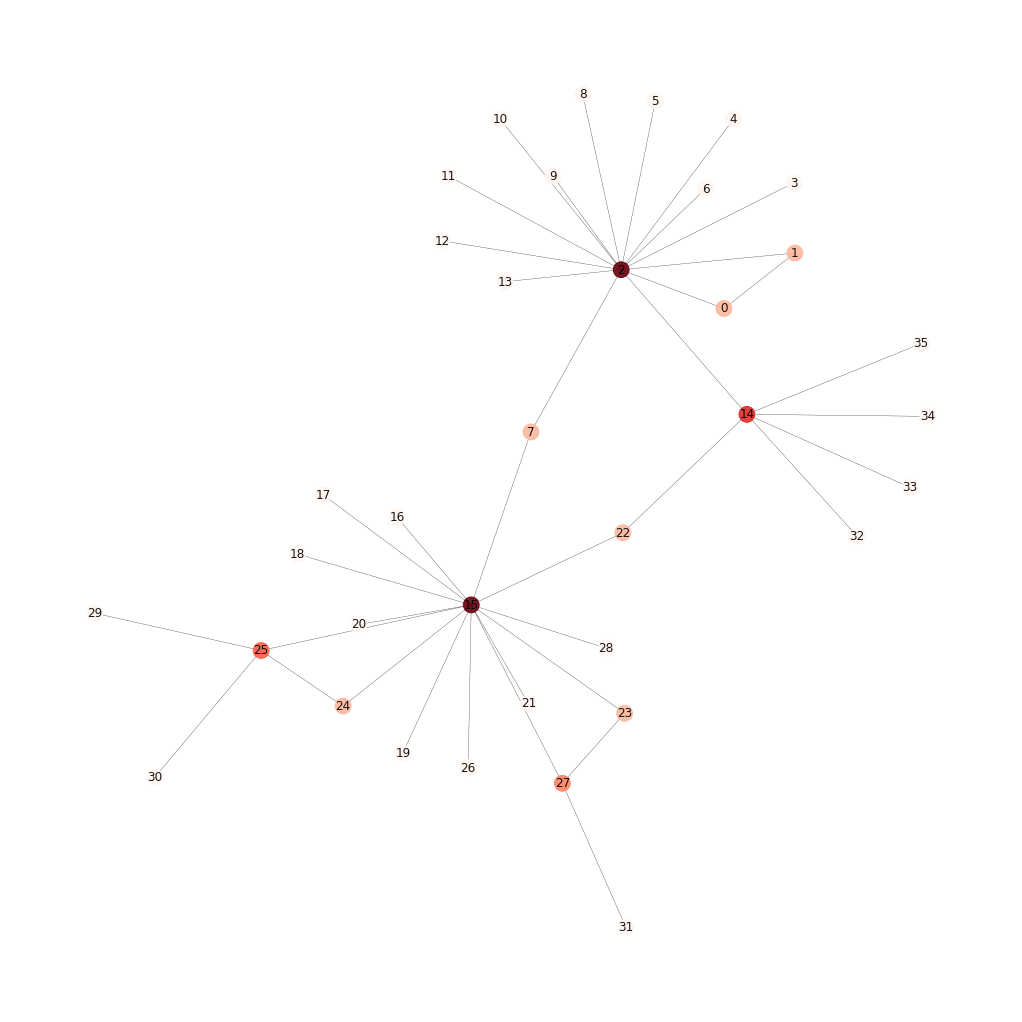

In [21]:
code_color=[]
for i in G.nodes():
    code_color.append(log(G.degree(i)))  # note the log here

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=12)

In [22]:
a=open("data/USPTO_2012_5_proj_attributes_NEW.csv","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['ID,Patent_industry,University,Patentcount,Turnoverlay,Turnover2012,Total_assets2012,Employees2012,RD2012,Countrycode']
['Bridgestone', 'Corporation,5,0,672,32271274,35121178,35115551,143448,956684,4']
['Denso', 'Corporation,5,0,20118,48105196,38034234,42263337,132276,3563038,4']
['AISIN', 'SEIKI', 'KABUSHIKI', 'KAISHA,5,0,2214,302352,0,0,0,0,4']
['Aisin', 'AW', 'Co.', 'Ltd.,5,0,1246,13036274,0,0,0,0,4']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,5,0,9120,276669260,234351491,376880705,333498,8576251,4']
['Honda', 'Motor', 'Co.', 'Ltd.,5,0,8143,144657174,104917126,144825890,190338,5950823,4']
['Advics', 'Co.', 'Ltd.,5,0,128,2103944,0,0,0,0,4']
['Nippon', 'Soken', 'Inc.,5,0,374,0,0,0,0,0,4']
['JTEKT', 'Corporation,5,0,490,13571616,11338567,10907414,41714,386139,4']
['Keihin', 'Corporation,5,0,126,3310048,3132693,2389336,20807,8603,4']
['DENSO', 'International', 'America', 'Inc.,5,0,8,48105196,38034234,42263337,132276,3563038,4']
['Konami', 'Co.', 'Ltd.,5,0,14,2255363,2400372,3430144,553

In [27]:
a=open("data/USPTO_2012_5_proj_attributes_NEW.csv","r")
c=0
for i in a:
    n=i.strip().split(',')
    if c>0:               
        ids=n[0]
        ID=n[1]
        University=n[2]
        Patentcount=n[3]
        Turnoverlay=n[4]
        Turnover2012=n[5]
        Total_assets2012=n[6]
        Employees2012=n[7]
        RD2012=n[8]
        Countrycode=n[9]
        
         
        G.nodes[ids]['University']=University
        G.nodes[ids]['Patentcount']=int(Patentcount)
        G.nodes[ids]['Turnoverlay']=int(Turnoverlay)
        G.nodes[ids]['Turnover2012']=int(Turnover2012)
        G.nodes[ids]['Totalassets2012']=int(Totalassets2012)
        G.nodes[ids]['Employees2012']=int(Employees2012)
        G.nodes[ids]['RD2012']=int(RD2012)
        G.nodes[ids]['Countrycode']=int(Countrycode)
        
        
    c+=1   
    
a.close()

NameError: name 'Totalassets2012' is not defined

In [ ]:
for i in G.nodes():
    print (i,G.nodes[i])

In [ ]:
counter=0
a=open("data/USPTO_2012_5_proj_attributes_NEW.csv","r",encoding='latin1')
for i in a:
    if counter>0:
        n=i.strip().split(',')
        id_node=n[0]
        Turnover2012=n[5].strip().split()[0]
        Totalassets2012=n[6].strip().split()[0]
        Employees2012=n[7].strip().split()[0]
        RD2012=n[8].strip().split()[0]
        print (id_node,Turnover2012,Totalassets2012,Employees2012,RD2012,)
    counter+=1
a.close()

In [ ]:
# we can now store all of this


counter=0
a=open("data/USPTO_2012_5_proj_attributes_NEW.csv","r",encoding='latin1')
for i in a:
    if counter>5:
        n=i.strip().split(',')
        
        id_node=n[0]
        Turnover2012=n[5].strip().split()[0]
        Totalassets_2012=n[6].strip().split()[0]
        Employees2012=n[7].strip().split()[0]
        RD2012=n[8].strip().split()[0]
        
        
        # we can then store all of these as attributes of our nodes/companies
        G.nodes[id_node]['Turnover2012']=Turnover2012
        G.nodes[id_node]['Totalassets2012']=Total_assets2012
        G.nodes[id_node]['Employees2012']=Employees2012
        G.nodes[id_node]['RD_2012']=RD2012
        
        
    counter+=1
       
    
a.close()

In [ ]:
x=[]
y=[]
for i in G.nodes():
    x.append(G.degree(i))
    y.append(G.nodes[i]['Turnover2012'])  # x and y contain the list of degree and number of employees for each node
    
# we can just directly plot the scatter plot
plt.scatter(x,y,marker='o',color='Red')
plt.xlabel('Degree')
plt.ylabel('Revenue')
plt.xscale('log')
plt.show()

In [ ]:
# let's plot the network showing the revenue as attribute

code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['Turnover2012'])

plt.figure(1,figsize=(10,10))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='blue'
        ,node_color=code_color,labels=ids_label,font_size=12)

In [ ]:
# let's consider total assets

code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['Totalassets2012'])

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=code_color,labels=ids_label,font_size=12)

In [ ]:
# what do we learn?

# let's study the correlation with the degree
# let's start with the scatter plot

x=[]
y=[]
for i in G.nodes():
    x.append(G.degree(i))
    y.append(G.nodes[i]['Totalassets2012'])  # x and y contain the list of degree and number of employees for each node
    
# we can just directly plot the scatter plot
plt.scatter(x,y,marker='o',color='Red')
plt.xlabel('Degree')
plt.ylabel('employees')
plt.xscale('log')
plt.show()

# Closeness centrality

In [28]:
G=nx.Graph()
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r")
for i in a:
    n=i.strip().split(',')
    G.add_edge(n[0],n[1])
a.close()

In [29]:
# we can compute the closeness quite easily
l=nx.closeness_centrality(G)

# let's create a list with the closeness values and see which nodes are at the top
closeness=[]
for i in G.nodes():
            closeness.append([l[i],i])
closeness=sorted(closeness,reverse=True)

In [30]:
# let's see the top 10
for i in range(10):
    print ("Rank = ",i+1,"Closeness = ", "{:.2f}".format(closeness[i][0]), "Node id = ",closeness[i][1])

Rank =  1 Closeness =  0.49 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Closeness =  0.47 Node id =  Honda Motor Co. Ltd.
Rank =  3 Closeness =  0.47 Node id =  Tokai Rubber Industries Ltd.
Rank =  4 Closeness =  0.43 Node id =  Denso Corporation
Rank =  5 Closeness =  0.42 Node id =  Nippon Soken Inc.
Rank =  6 Closeness =  0.35 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  7 Closeness =  0.34 Node id =  JTEKT Corporation
Rank =  8 Closeness =  0.34 Node id =  Aisin AW Co. Ltd.
Rank =  9 Closeness =  0.34 Node id =  Fuji Kiko Co. Ltd.
Rank =  10 Closeness =  0.33 Node id =  Yamaha Hatsudoki Kabushiki Kaisha


In [31]:
# let's see the histogram of this centrality
# remember we wrote a function to create and show the histogram for the degree

def degree_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    degree_list=[]
    for i in G.nodes():
        degree_list.append(G.degree(i))
    
    plt.hist(degree_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.show()

In [32]:
# we need to change it to consider closeness
def closeness_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    l=nx.closeness_centrality(G)

    closeness_list=[]
    for i in l:
            closeness_list.append(l[i])
    
    plt.hist(closeness_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Closeness')
    plt.ylabel('Frequency')

    plt.show()

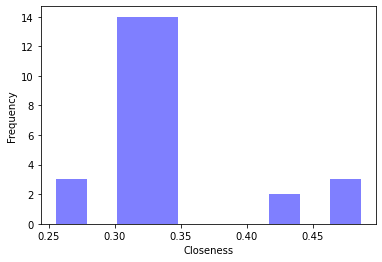

In [33]:
closeness_histogram(G,10,'blue',0.5)

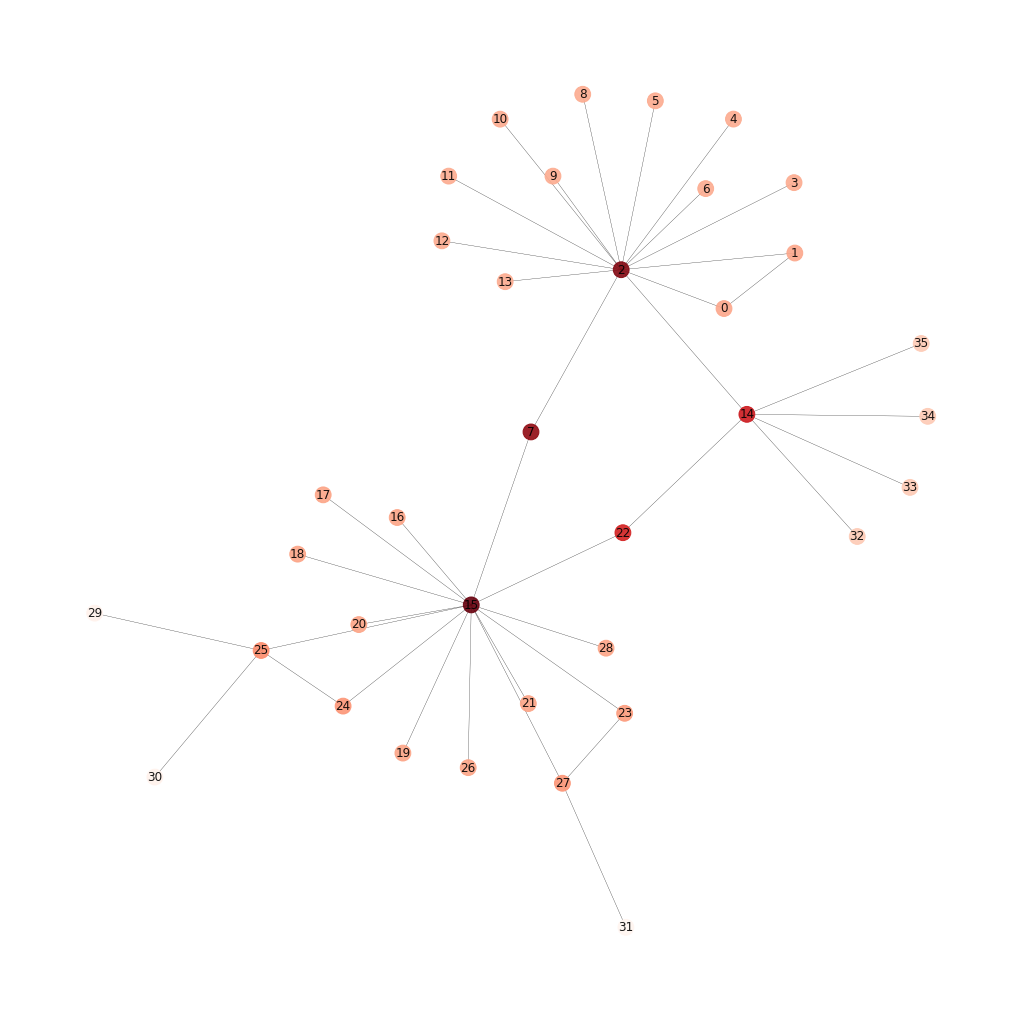

In [34]:
# let's plot the network considering closeness as attribute

l=nx.closeness_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node

plt.figure(1,figsize=(14,14))


# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

In [35]:
# what about the correlation between closeness and degree in this case?
# as before we can use the kendall tau 
# we created a function that takes as input the list of [value,id node]
# so we need to create the two lists

# let's get the degree first
degree_list=[]
for i in G.nodes():
    degree_list.append([G.degree(i),i])
    
    
# then the closeness centrality
l=nx.closeness_centrality(G)
closeness_list=[]
for i in l:
    closeness_list.append([l[i],i])
    
# we need to order them first!
    
degree_list=sorted(degree_list)
closeness_list=sorted(closeness_list)

for i in range(len(G.nodes())):
    print (degree_list[i][1],closeness_list[i][1])  # this are the two ordered list of nodes for degree and closeness

Advics Co. Ltd. Toyooki Kogyo Co. Ltd.
Aisin Keikinzoku Kabushiki Kaisha Aisin Keikinzoku Kabushiki Kaisha
Bridgestone Corporation Konami Co. Ltd.
DENSO International America Inc. Advics Co. Ltd.
Fuji Jukogyo Kabushiki Kaisha DENSO International America Inc.
Gentest Corporation Hitachi Metals Ltd.
Hitachi Metals Ltd. Kyosan Denki Co. Ltd.
Honda Access Corp. Bridgestone Corporation
Illinois Tool Works Inc. Gentest Corporation
Keihin Corporation Honda Access Corp.
Konami Co. Ltd. Illinois Tool Works Inc.
Kyosan Denki Co. Ltd. Keihin Corporation
MEC International Co. Ltd. NSK LTD.
Mitsui High-Tec Inc. Nifco Inc.
NSK LTD. Nissin Kogyo Co. Ltd.
Nifco Inc. Saga Tekkohsho Co. Ltd.
Nissin Kogyo Co. Ltd. Takata Corporation
Saga Tekkohsho Co. Ltd. Nippon Light Metal Company Limited
Taiho Kogyo Ltd. Novelis Inc.
Takata Corporation Fuji Jukogyo Kabushiki Kaisha
Toyo Tire & Rubber Co. Ltd. MEC International Co. Ltd.
Toyoda Gosei Co. Ltd. Mitsui High-Tec Inc.
Toyooki Kogyo Co. Ltd. Taiho Kogyo Ltd.


# Betweenness centrality

In [36]:
# let's consider the same network as done so far
# the betweenness can be computed directly

l=nx.betweenness_centrality(G) # this is the function

# let's create the list of [betweeneess,node id] to see the most central nodes

betweenness=[]
for i in G.nodes():
    betweenness.append([l[i],i])
    
betweenness=sorted(betweenness,reverse=True)

In [37]:
# let's see the top 15
for i in range(15):
    print ("Rank = ",i+1,"Betweenness = ", betweenness[i][0], "Node id = ",betweenness[i][1])

Rank =  1 Betweenness =  0.6672268907563026 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Betweenness =  0.5815126050420169 Node id =  Honda Motor Co. Ltd.
Rank =  3 Betweenness =  0.34957983193277314 Node id =  Tokai Rubber Industries Ltd.
Rank =  4 Betweenness =  0.24033613445378152 Node id =  Denso Corporation
Rank =  5 Betweenness =  0.13445378151260506 Node id =  Nippon Soken Inc.
Rank =  6 Betweenness =  0.11260504201680673 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  7 Betweenness =  0.05714285714285715 Node id =  JTEKT Corporation
Rank =  8 Betweenness =  0.0 Node id =  Yamaha Hatsudoki Kabushiki Kaisha
Rank =  9 Betweenness =  0.0 Node id =  Toyota Motor East Japan Inc.
Rank =  10 Betweenness =  0.0 Node id =  Toyooki Kogyo Co. Ltd.
Rank =  11 Betweenness =  0.0 Node id =  Toyoda Gosei Co. Ltd.
Rank =  12 Betweenness =  0.0 Node id =  Toyo Tire & Rubber Co. Ltd.
Rank =  13 Betweenness =  0.0 Node id =  Takata Corporation
Rank =  14 Betweenness =  0.0 Node id =  Taiho

In [38]:
# as done before let's cut the number of digits

for i in range(15):
    print ("Rank = ",i+1,"Betweenness = ", "{:.2f}".format(betweenness[i][0]), "Node id = ",betweenness[i][1])

Rank =  1 Betweenness =  0.67 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Betweenness =  0.58 Node id =  Honda Motor Co. Ltd.
Rank =  3 Betweenness =  0.35 Node id =  Tokai Rubber Industries Ltd.
Rank =  4 Betweenness =  0.24 Node id =  Denso Corporation
Rank =  5 Betweenness =  0.13 Node id =  Nippon Soken Inc.
Rank =  6 Betweenness =  0.11 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  7 Betweenness =  0.06 Node id =  JTEKT Corporation
Rank =  8 Betweenness =  0.00 Node id =  Yamaha Hatsudoki Kabushiki Kaisha
Rank =  9 Betweenness =  0.00 Node id =  Toyota Motor East Japan Inc.
Rank =  10 Betweenness =  0.00 Node id =  Toyooki Kogyo Co. Ltd.
Rank =  11 Betweenness =  0.00 Node id =  Toyoda Gosei Co. Ltd.
Rank =  12 Betweenness =  0.00 Node id =  Toyo Tire & Rubber Co. Ltd.
Rank =  13 Betweenness =  0.00 Node id =  Takata Corporation
Rank =  14 Betweenness =  0.00 Node id =  Taiho Kogyo Ltd.
Rank =  15 Betweenness =  0.00 Node id =  Saga Tekkohsho Co. Ltd.


In [39]:
# several other nodes have value zero!
for i in range(15):
    print ("Rank = ",i+1,"Betweenness = ", "{:.2f}".format(betweenness[i][0]), "Node id = ",betweenness[i][1])

Rank =  1 Betweenness =  0.67 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Betweenness =  0.58 Node id =  Honda Motor Co. Ltd.
Rank =  3 Betweenness =  0.35 Node id =  Tokai Rubber Industries Ltd.
Rank =  4 Betweenness =  0.24 Node id =  Denso Corporation
Rank =  5 Betweenness =  0.13 Node id =  Nippon Soken Inc.
Rank =  6 Betweenness =  0.11 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  7 Betweenness =  0.06 Node id =  JTEKT Corporation
Rank =  8 Betweenness =  0.00 Node id =  Yamaha Hatsudoki Kabushiki Kaisha
Rank =  9 Betweenness =  0.00 Node id =  Toyota Motor East Japan Inc.
Rank =  10 Betweenness =  0.00 Node id =  Toyooki Kogyo Co. Ltd.
Rank =  11 Betweenness =  0.00 Node id =  Toyoda Gosei Co. Ltd.
Rank =  12 Betweenness =  0.00 Node id =  Toyo Tire & Rubber Co. Ltd.
Rank =  13 Betweenness =  0.00 Node id =  Takata Corporation
Rank =  14 Betweenness =  0.00 Node id =  Taiho Kogyo Ltd.
Rank =  15 Betweenness =  0.00 Node id =  Saga Tekkohsho Co. Ltd.


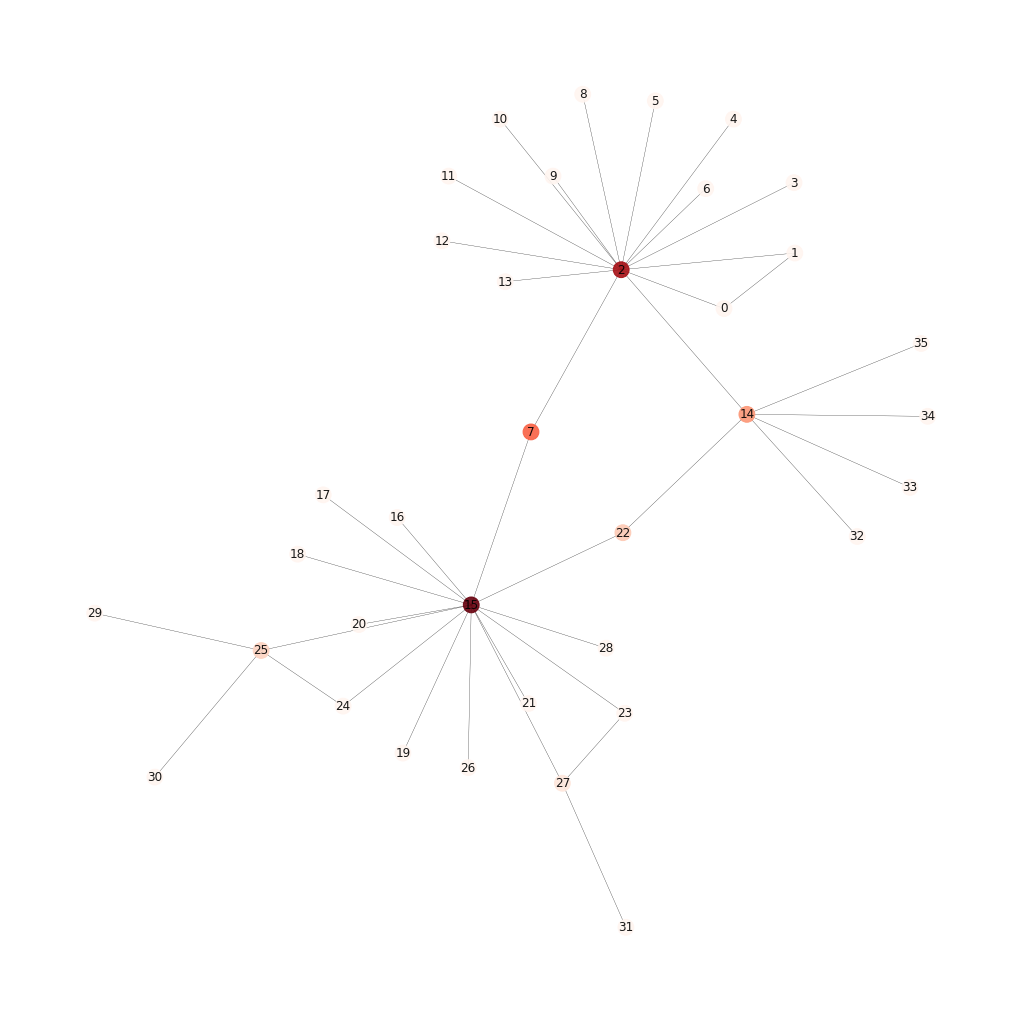

In [40]:
# let's plot the network using the betweenness as attribute

l=nx.betweenness_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node



# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

In [41]:
# let's plot the histogram
# we need to modify the function

# we need to change it to consider closeness
def betweenness_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    l=nx.betweenness_centrality(G)

    betweenness_list=[]
    for i in l:
            betweenness_list.append(l[i])
    
    plt.hist(betweenness_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Betweenness')
    plt.ylabel('Frequency')

    plt.show()


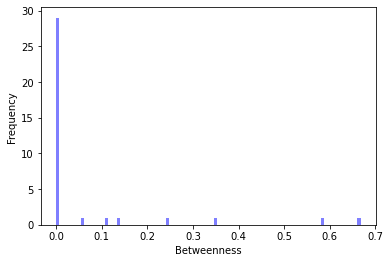

In [42]:
betweenness_histogram(G,100,'Blue',0.5)  # note the large number of bins, why do we need so many?

In [43]:
# we can change the function making it general in a way that we can use the same to plot the histogram
# of any centrality measure

def centrality_histogram(G,bins,color_bars,alpha_value,centrality_measure): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    
    # here we define which centrality measure to consider
    if centrality_measure=="betweenness":
        l=nx.betweenness_centrality(G)
        
    if centrality_measure=="closeness":
        l=nx.closeness_centrality(G)
        
    if centrality_measure=="degree":
        l=nx.degree_centrality(G)
        
    # the plot is then done after the selection of the centrality measure
    
    
    cent_list=[]
    for i in l:
            cent_list.append(l[i])
    
    plt.hist(cent_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel(centrality_measure)  # note how "centrality_measure" is an input of the function now!
    plt.ylabel('Frequency')

    plt.show()

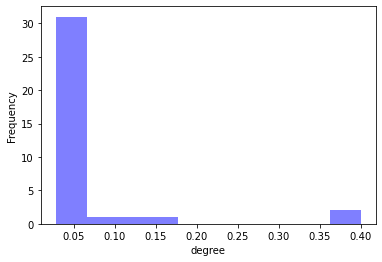

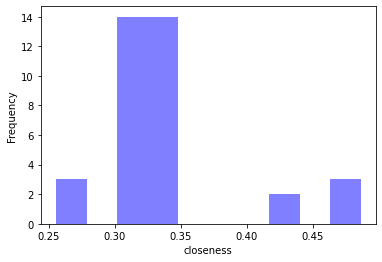

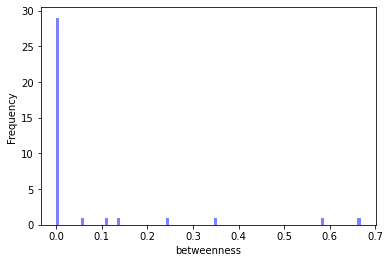

In [44]:

# we can then plot all of the them
centrality_histogram(G,10,'Blue',0.5,'degree')
centrality_histogram(G,10,'Blue',0.5,'closeness')
centrality_histogram(G,100,'Blue',0.5,'betweenness')

# Eigenvector centrality

In [45]:
# as for the others, we can just call the function

l=nx.eigenvector_centrality(G)

# let's compute the list of top nodes of this quantity
eigenv_centrality=[]
for i in G.nodes():
        eigenv_centrality.append([l[i],i])
eigenv_centrality=sorted(eigenv_centrality,reverse=True)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [ ]:
# let's see the top 10
for i in range(10):
    print ("Rank = ",i+1,"Eigenvector Cent. = ", "{:.2f}".format(eigenv_centrality[i][0]), "Node id = ",eigenv_centrality[i][1])

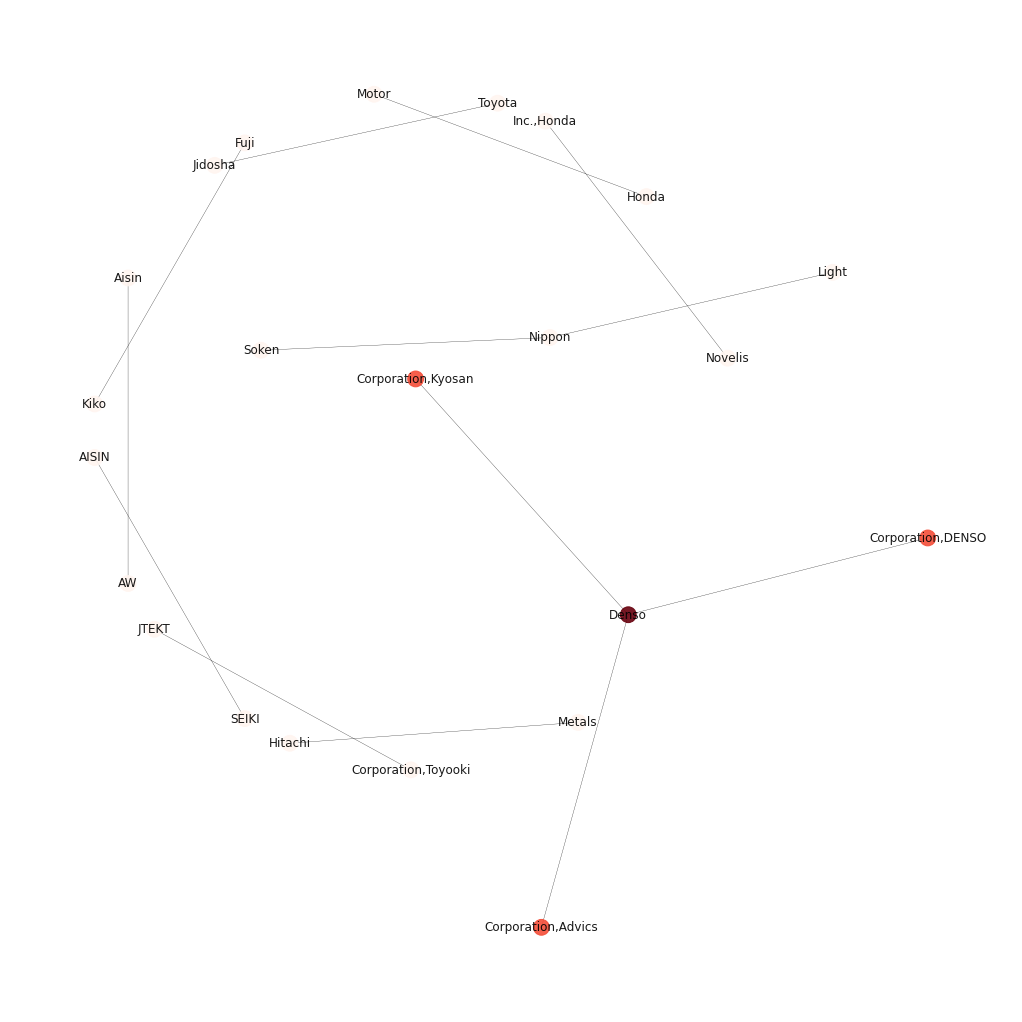

In [55]:
l=nx.eigenvector_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node



# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

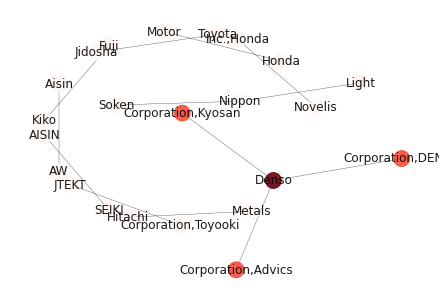

In [56]:
l=nx.eigenvector_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node



# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

In [57]:
# let's get a network from the folder data
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [58]:
# this is a simple list of edges
# let's store the network and plot it
G=nx.Graph()
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

print ("Number of nodes =", G.number_of_nodes())
print ("Number of edges =", G.number_of_edges())

Number of nodes = 23
Number of edges = 13


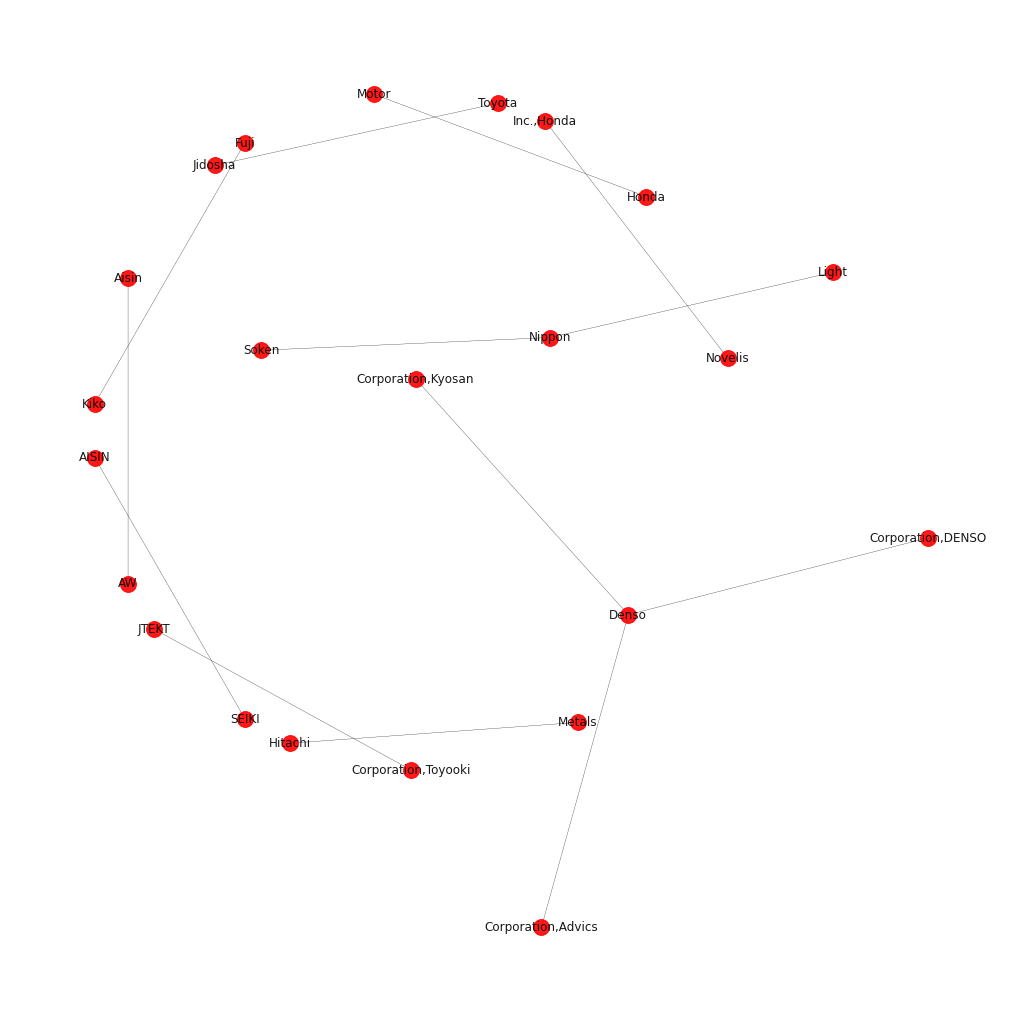

In [59]:
ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=i
    counter+=1
    
plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [60]:
# there are several measures we discussed in the lecture to measure the cohesiveness of networks
# density: the ratio between the number of edges and the total possible number of edges
# let's compute it

# what is the highest number of edges in a network with N nodes

N=G.number_of_nodes() # this is the number of nodes

E_max= N*(N-1.)/2.  # this is the largest number of indirected edges

print (E_max)

253.0


In [61]:
# let's create a function that computes the largest number of edges in a network

def max_edges(G):
    N=G.number_of_nodes() # this is the number of nodes

    E_max= N*(N-1.)/2.  # this is the largest number of indirected edges

    return E_max

In [62]:
print (max_edges(G))

253.0


In [63]:
# the density is simply E/E_max

E=G.number_of_edges()
Density=E/max_edges(G)

print (Density)

0.05138339920948617


In [64]:
# another quantity is the clustering
# how many of my friends are themself friends?

clustering=nx.clustering(G) # this can be easily calculated using the function clustering

In [65]:
# let's see the values for each node
for i in clustering:
    print (i,clustering[i])

Nippon 0
Light 0
Novelis 0
Inc.,Honda 0
Honda 0
Motor 0
Toyota 0
Jidosha 0
Soken 0
Fuji 0
Kiko 0
Aisin 0
AW 0
AISIN 0
SEIKI 0
JTEKT 0
Corporation,Toyooki 0
Hitachi 0
Metals 0
Denso 0
Corporation,Advics 0
Corporation,DENSO 0
Corporation,Kyosan 0


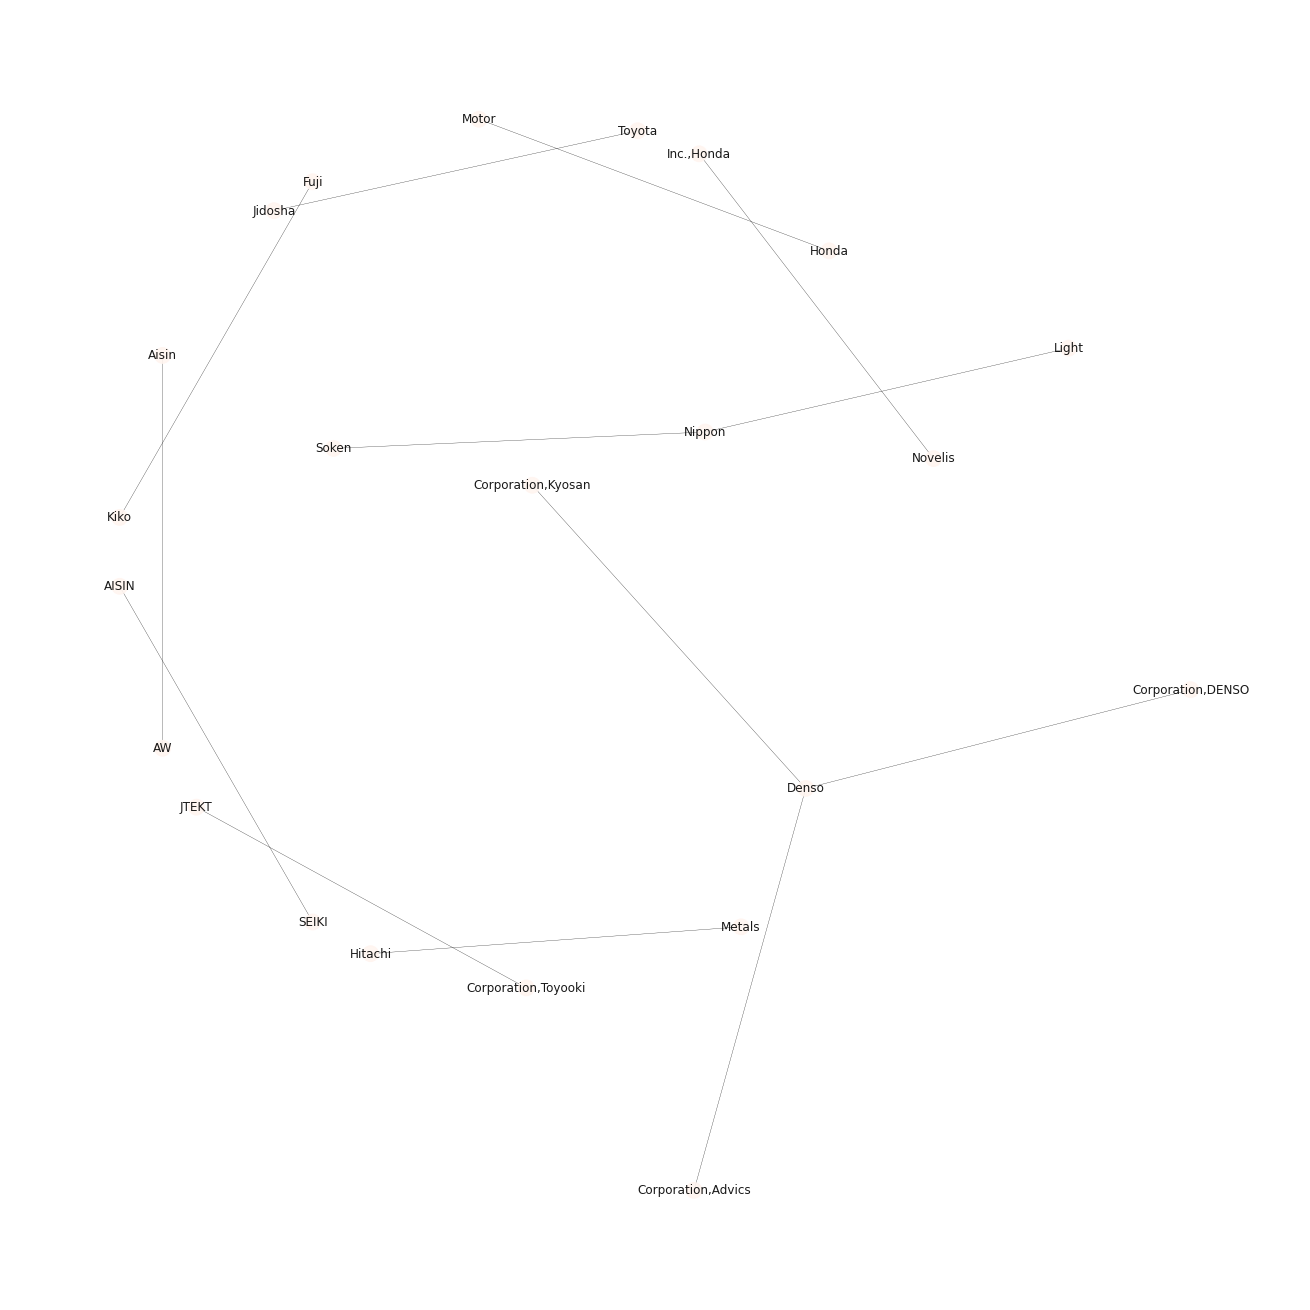

In [66]:
# how do we interpret these numbers?
# how they are connected to innovation/exploitation?

# let's plot the network using these as attribibutes

# let's plot the values of clustering
color_code=[]
for i in clustering:
    color_code.append(clustering[i])

plt.figure(1,figsize=(18,18))
nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=color_code,labels=ids_label,font_size=12)

In [67]:
# another measure is the average clustering
average_clustering=0.
for i in clustering:
    average_clustering+=clustering[i]/G.number_of_nodes()
    
print ("Average clustering =","{:.2f}".format(average_clustering))

Average clustering = 0.00


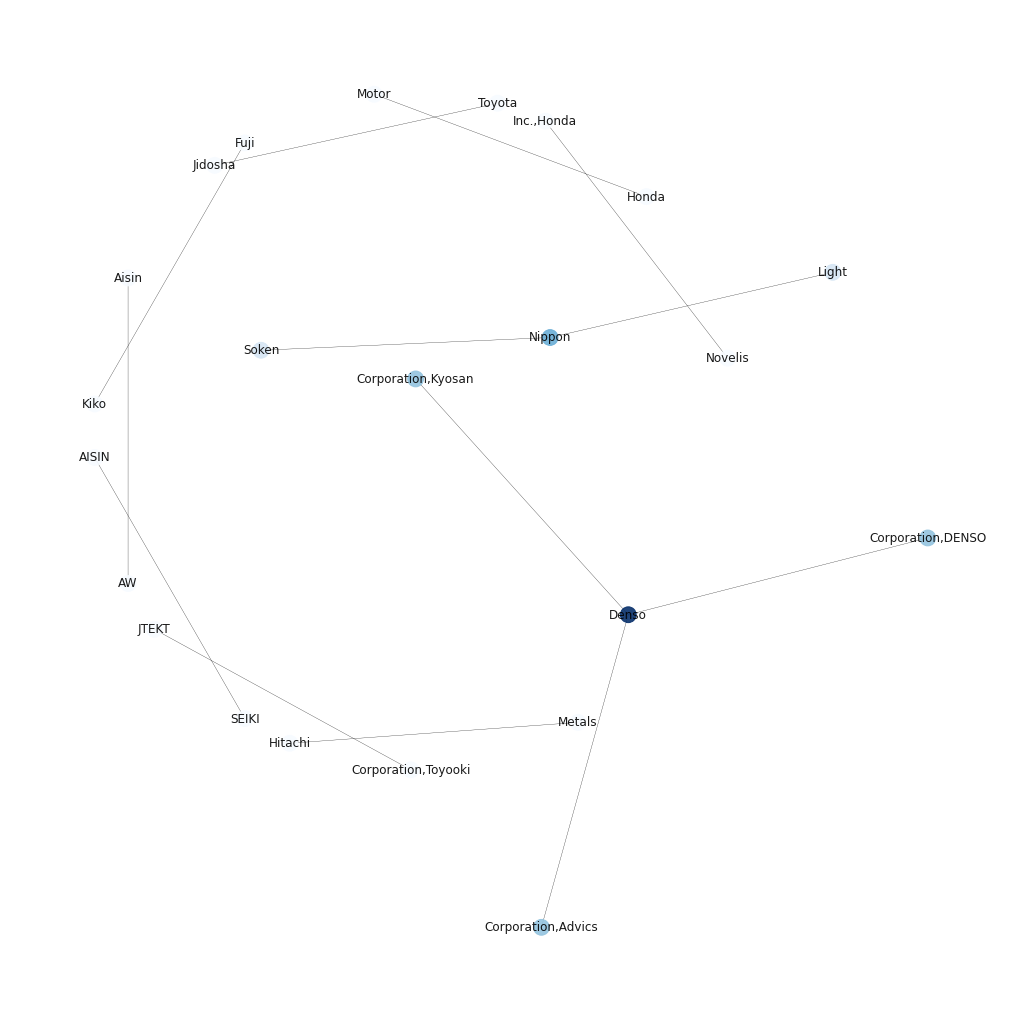

In [68]:
# another measure to quantify the level of cohesiveness is a centrality metric: closeness

closeness=nx.closeness_centrality(G) # by now you should remember this function


color_code=[]
for i in closeness:
    color_code.append(closeness[i])
    
plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Blues'
        ,node_color=color_code,labels=ids_label,font_size=12)

In [69]:
# what do we see? what do we learn?

# let's see the values of the closeness!
for i in closeness:
    print (i,"{:.2f}".format(closeness[i]))

Nippon 0.09
Light 0.06
Novelis 0.05
Inc.,Honda 0.05
Honda 0.05
Motor 0.05
Toyota 0.05
Jidosha 0.05
Soken 0.06
Fuji 0.05
Kiko 0.05
Aisin 0.05
AW 0.05
AISIN 0.05
SEIKI 0.05
JTEKT 0.05
Corporation,Toyooki 0.05
Hitachi 0.05
Metals 0.05
Denso 0.14
Corporation,Advics 0.08
Corporation,DENSO 0.08
Corporation,Kyosan 0.08


In [70]:

# the effective size (a measure of structural holes)
# the effective size (a measure of structural holes)
𝐸𝑆𝑖=𝑘𝑖−2𝑡𝑘𝑖
 
t = number of ties in the ego-network of i

k_i = degree of i

note that 2t/(k_i) is equivalent to the average degree of the alters of node i

SyntaxError: invalid character '−' (U+2212) (Temp/ipykernel_7140/4209139378.py, line 3)

In [71]:
# the effective size can be computed using a networkx function

eff_size=nx.effective_size(G)

In [72]:
# let's see the values for each node

for i in eff_size:
    print (i,eff_size[i])

Nippon 2.0
Light 1.0
Novelis 1.0
Inc.,Honda 1.0
Honda 1.0
Motor 1.0
Toyota 1.0
Jidosha 1.0
Soken 1.0
Fuji 1.0
Kiko 1.0
Aisin 1.0
AW 1.0
AISIN 1.0
SEIKI 1.0
JTEKT 1.0
Corporation,Toyooki 1.0
Hitachi 1.0
Metals 1.0
Denso 3.0
Corporation,Advics 1.0
Corporation,DENSO 1.0
Corporation,Kyosan 1.0


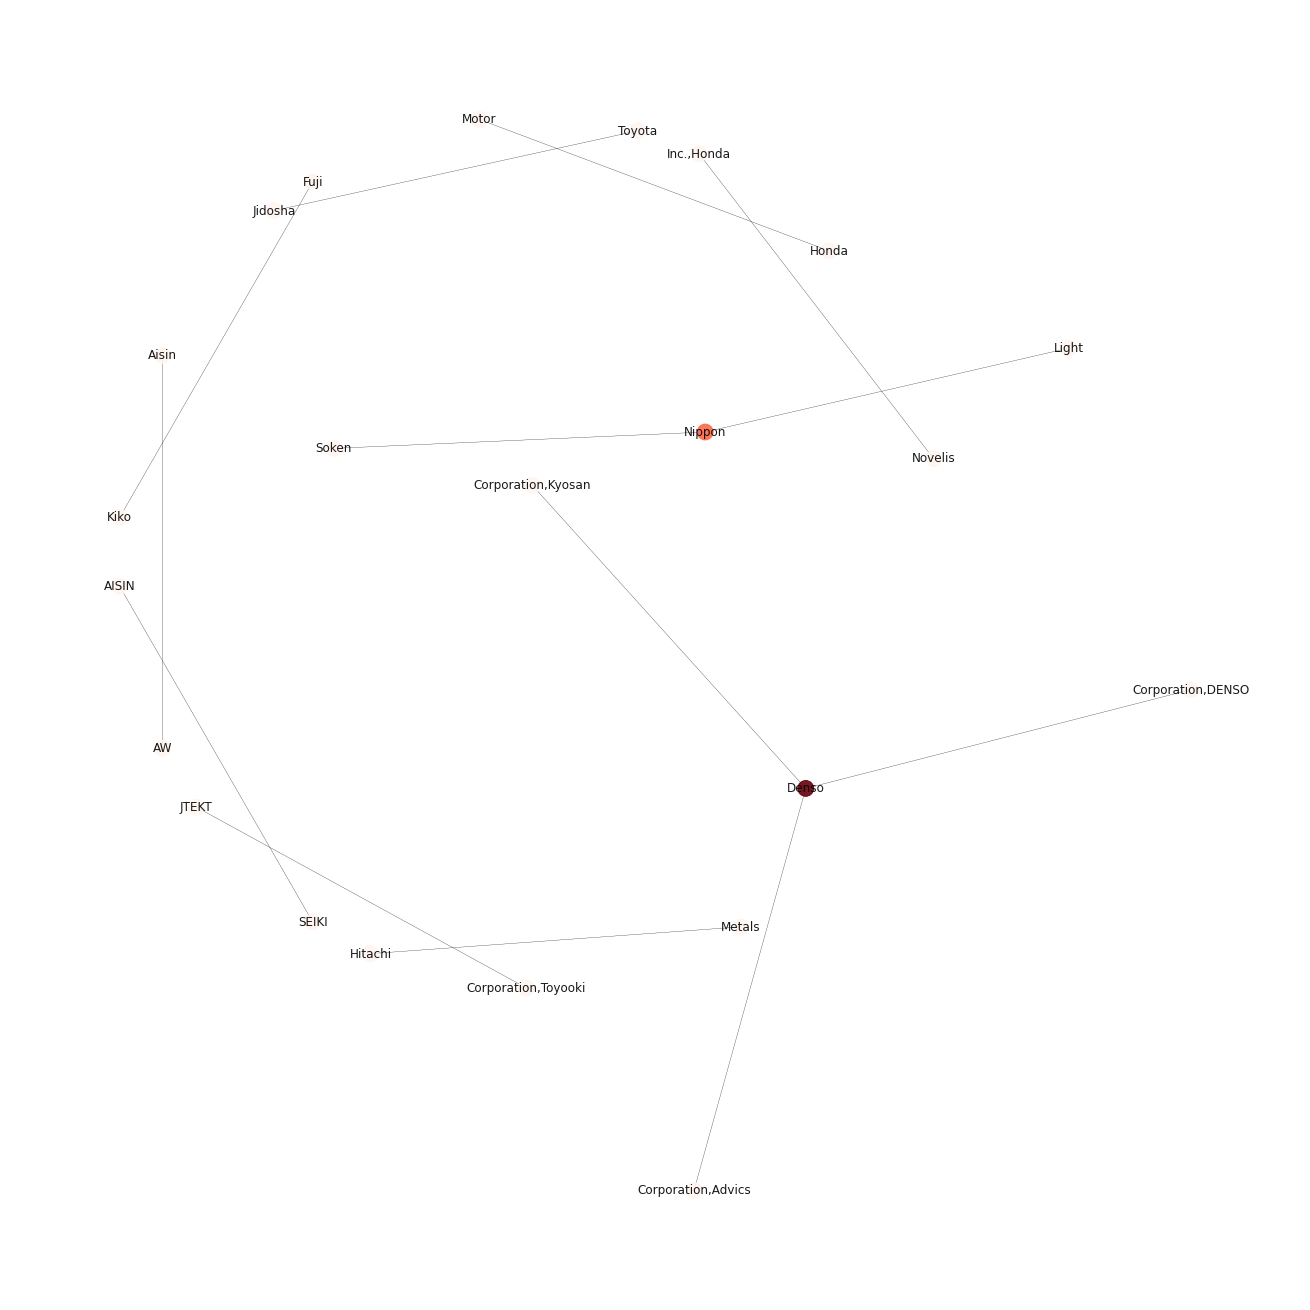

In [73]:
color_code=[]
for i in eff_size:
    color_code.append(eff_size[i])

plt.figure(1,figsize=(18,18))
nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black",cmap='Reds'
        ,node_color=color_code,labels=ids_label,font_size=12)

# robustness and cores

In [46]:
# let's get a network from the folder data
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [47]:
# this is a simple list of edges
# let's store the network and plot it
G=nx.Graph()
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

print ("Number of nodes =", G.number_of_nodes())
print ("Number of edges =", G.number_of_edges())

Number of nodes = 23
Number of edges = 13


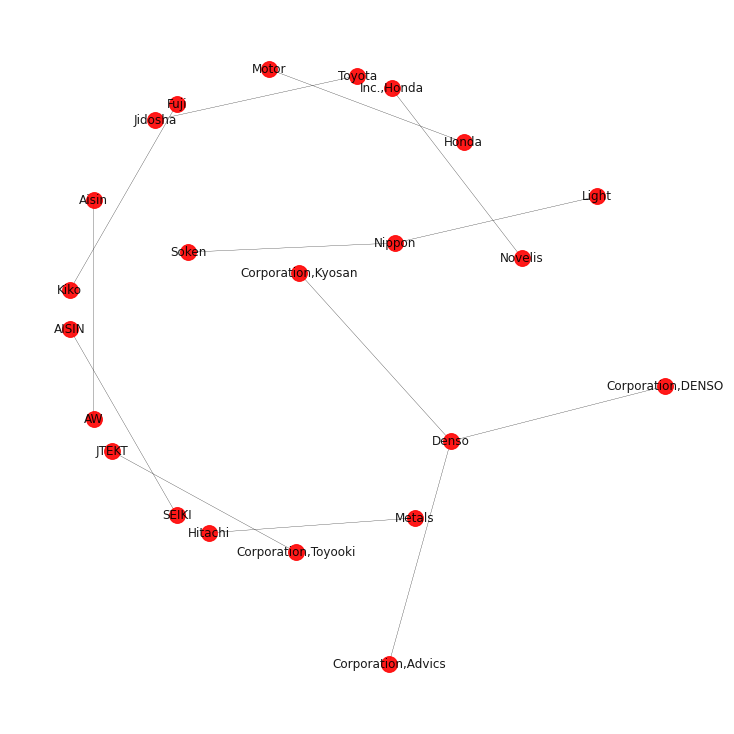

In [52]:
ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=i
    counter+=1
    
plt.figure(1,figsize=(10,10))
    


nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [49]:
# let's create a function to compute the centralization

def centralization(G):
    # what do we need?
    # we need the number of nodes and the max degree
    N=G.number_of_nodes()
    
    # this the fastest way to compute the largest value in a list
    max_degree=0
    for i in G.nodes():
        if G.degree(i)>max_degree:
            max_degree=G.degree(i)
            
    # we have now all the information necessary to compute the sum
    
    numerator=0.
    for i in G.nodes():
        numerator += (max_degree-G.degree(i))
    
    denominator=(N-1.)*(N-2.)
    
    return numerator/denominator

In [50]:
# let's see if it works

print (centralization(G))

0.09307359307359307


Number of nodes = 23
Number of edges = 13


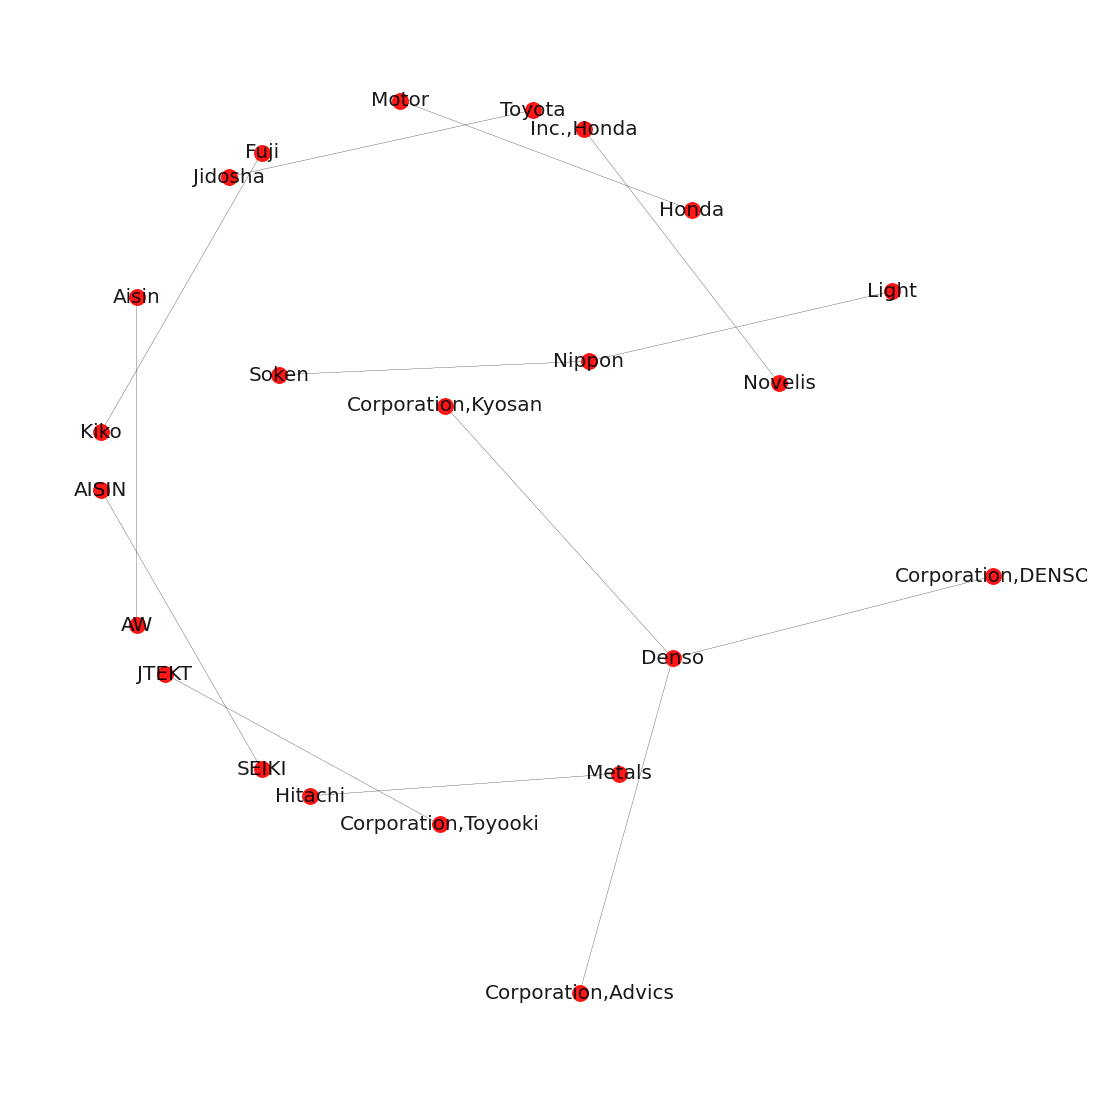

In [53]:
G=nx.Graph()
a=open('data/USPTO_2012_5_proj_edgelist_NEW.csv','r')
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

print ("Number of nodes =", G.number_of_nodes())
print ("Number of edges =", G.number_of_edges())

ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=i
    counter+=1
    
plt.figure(1,figsize=(15,15))

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=20)